In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


# Data preprocessing and standartization

In [2]:
# reading and normalising the dataset
df = pd.read_csv('cancer.csv')
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

# creating features and label 
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 0)

# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Principal Component Analysis (Dimensionality Reduction)

In [26]:
n_components  = 3

pca = PCA(n_components = n_components)
pca.fit(X_train)

pc_train = pd.DataFrame(pca.transform(X_train), columns=["P" + str(i + 1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test), columns = ["P" + str(i + 1) for i in range(n_components)])
                        


In [27]:
pc_train #run to see how reduced df looks like

,P1,P2,P3
0,-0.870436,0.997914,-1.355659
1,-2.101854,1.202874,-0.093624
2,-1.684690,0.066485,-0.807668
3,-1.456402,-2.952403,-0.968418
4,-1.663855,3.357465,-2.382846
...,...,...,...
393,-1.931645,-1.524048,0.995208
394,10.016857,0.960326,-2.893888
395,-2.227052,0.913116,-0.473588
396,-5.036923,2.126892,3.408886


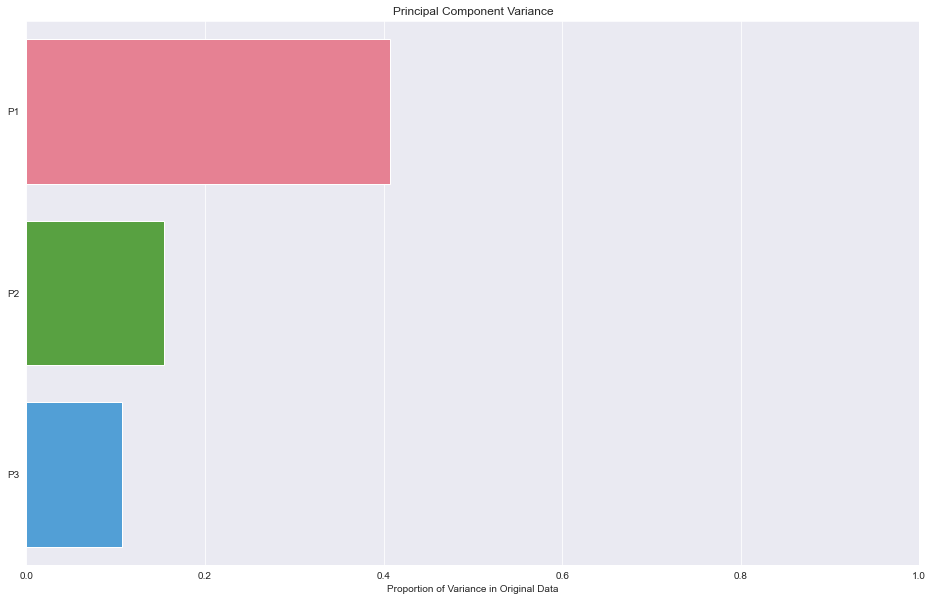

In [28]:
plt.figure(figsize=(16, 10
                   ))
sns.barplot(x=pca.explained_variance_ratio_, y = ["P" + str(i + 1) for i in range(n_components)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Model Accuracy (Original Data): {:.5f}%".format(dtc.score(X_test, y_test) * 100))


Model Accuracy (Original Data): 92.98246%


In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(pc_train, y_train)
print("Model Accuracy (PCA Data): {:.5f}%".format(dtc.score(pc_test, y_test) * 100))


Model Accuracy (PCA Data): 92.98246%


# If we drop highly correlated features instead of using PCA

In [32]:
df = pd.read_csv('cancer.csv')
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [33]:
corr_matrix = df.corr().abs() 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]
df = df.drop(to_drop, axis = 1)

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)
grid_search_dt.best_params_

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [36]:
grid_search_dt.best_score_

0.9623417721518986